In [1]:
import matplotlib.pyplot as plt
import pandas 
import math
import numpy as np
import random
from numpy import linalg
from numpy import matrix
import time
%matplotlib inline

In [2]:
#alpha = 0.2
alphas = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
performance = []
start_time = time.time()


profile = [0] * 10
import tqdm
def extract_features(features_string):
    return np.matrix(map(lambda x: float(x.split(':')[1]), features_string.split(' ')[1:6]))

for alpha in alphas:
    data = open('data10')
    user_articles = [''] * 20
    payoff_for_user = [0.] * 20
    sum_reward_of_alg = 0.
    sum_reward_of_data = 0.
    matrix_A = {}
    inversed_matrix_A = {}
    vector_b = {}
    payoff = {}
    tetas = {}

    try:
        for line in tqdm.tqdm(data):
            splitted = line.split('|')
            info = map(int, splitted[0].split(' ')[0:3])
            user = splitted[1]
            sum_reward_of_data = sum_reward_of_data + info[2]
            user_features = extract_features(user)
            st = time.clock()
            profile[0] += st - time.clock()  
            for i in xrange(20):
                st = time.clock()
                article = int(splitted[i + 2].split(' ')[0])
                user_articles[i] = article 

                if article not in matrix_A:
                    matrix_A[article] = np.matrix(np.identity(5))
                    inversed_matrix_A[article] = np.matrix(np.identity(5))
                    vector_b[article] = np.matrix(np.zeros(5))
                    tetas[article] = np.matrix(np.zeros(5)).T



                inverse_matrix = inversed_matrix_A[article] #np.ndarray


                teta = tetas[article]


                payoff[article] = teta.T * user_features.T  + alpha * math.sqrt(user_features * inverse_matrix  * user_features.T)
                payoff_for_user[i] = (float(payoff[article]))

            profile[1] += st - time.clock()
            st = time.clock()

            winner = np.argwhere(payoff_for_user == np.amax(payoff_for_user))
            chose_article = user_articles[random.choice(map(int, winner))]
            #print 'chose', chose_article

            profile[2] += st - time.clock()
            st = time.clock()
            if chose_article == info[1]: #if no information about article it ignors
                real_payoff = info[2] #click information
                sum_reward_of_alg = sum_reward_of_alg + real_payoff
                A = matrix_A[chose_article]
                b = vector_b[chose_article]

                matrix_A_buf =  A + user_features.T * user_features
                matrix_A[chose_article] = matrix_A_buf
                inversed_matrix_A[chose_article] = matrix_A_buf.I
                tetas[chose_article] = inversed_matrix_A[chose_article] * vector_b[chose_article].T
                vector_b[chose_article] = b + real_payoff * user_features
                profile[4] += st - time.clock()
                st = time.clock()
            else:
                #print 'No information about payoff of', chose_article
                pass

            profile[3] += st - time.clock()
            st = time.clock()




        data.close()
        performance.append(sum_reward_of_alg/sum_reward_of_data)
        print("--- %s seconds ---" % (time.time() - start_time))
    except KeyboardInterrupt:
        print "Interrupted"
        print profile

3770122it [39:54, 1574.52it/s]
80it [00:00, 797.39it/s]

--- 2394.54639506 seconds ---


3770122it [39:33, 1588.25it/s]
155it [00:00, 1548.56it/s]

--- 4768.30729103 seconds ---


3770122it [39:25, 1594.07it/s]
303it [00:00, 1503.13it/s]

--- 7133.40092802 seconds ---


3770122it [39:20, 1597.25it/s]
145it [00:00, 1446.44it/s]

--- 9493.79048204 seconds ---


3770122it [39:22, 1595.70it/s]
309it [00:00, 1524.01it/s]

--- 11856.462584 seconds ---


3770122it [39:22, 1595.55it/s]
299it [00:00, 1469.43it/s]

--- 14219.355839 seconds ---


3770122it [39:31, 1589.65it/s]
331it [00:00, 1627.40it/s]

--- 16591.0260789 seconds ---


3770122it [37:33, 1673.08it/s]
328it [00:00, 1633.93it/s]

--- 18844.4290769 seconds ---


3770122it [37:29, 1675.68it/s]
315it [00:00, 1581.90it/s]

--- 21094.33847 seconds ---


3770122it [37:33, 1673.30it/s]

--- 23347.4420631 seconds ---


[0.07203009623220856, 0.07138799937436717, 0.07262280102406217, 0.07082822262650543, 0.07451616355359451, 0.0725651769470764, 0.07257340895807436, 0.0722194324851618, 0.0726886571120459, 0.07221120047416384]


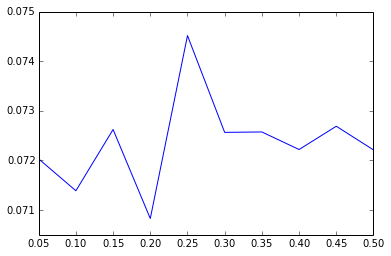

In [3]:
plt.plot(alphas, performance)
print performance
